<a href="https://www.kaggle.com/code/shaikhabdulrafay03/perceptron-using-gradient-descent?scriptVersionId=166589431" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Simple Perceptron Using Gradient Descent
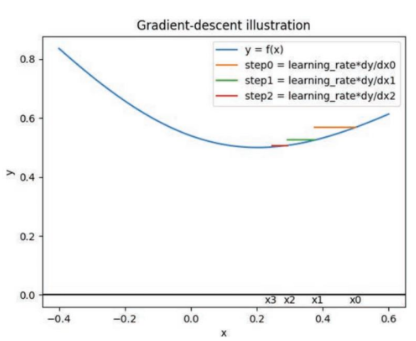
- A simple 2 input single layer perceptron implemented from scrtch
- activation Function : Sign function
- Wieght update : Gradient Descent ( wi = wn - ηf'(xn) )
- Implemented using Lists (Xtrain : List of Lists , ytrain : List)
- Target labels should be in 1/-1


# Function's description:

- fit(xtrain , ytrain , InitialWeights , epochs {default = 100} , Learning Rate{default = 0.01}) : 
    - perfroms the weighted summision for the number of epochs 
    - calls weights update 
    - returns the final weights

- updateweights(xtrain , ytrain , weights , LearningRate):
    - called by fit()
    - updates each weight using : wi = wn - ηf'(xn)
    - returns new Weights

- predict(xtest , weights):
    - perfroms the weighted summision 
    - Returns predictions(List)
 
- plot(weights ,x , y):
    - plots data points on a 2d graph (x1,x2)
    - draws a desicion boundry using the weights
    
 



In [1]:
import matplotlib.pyplot as plt
import numpy as np


def updateweights(xtrain , ytrain , ypreds , weights ,LR):

    new_params = []
    
    for i , w in zip(range(len(weights)) , weights):
        par_dev = cal_par_dev(ypreds , ytrain , xtrain,i)
        new_w = w - (LR * par_dev)
        new_params.append(new_w)
    
    return new_params


def cal_par_dev(ypred , yact , xtrain,i):
    sum = 0
    for x,ya,yp in zip(xtrain , yact , ypred):
        sum+= (yp - ya)*x[i]

    return sum/len(xtrain)



# def cal_cost (ypred , yact):
#     sum = 0
#     for yp , ya in zip(ypred , yact):
#         sum+= (ya - yp)**2
    
#     return sum/len(ypred)

def fit(xtrain , ytrain , weights , LR = 0.0001 , epochs = 100 ):
    
    correct = False
    counter = 0
    cost = []
    while counter < epochs  :
        preds = []
        for i,y in zip(xtrain,ytrain):
            z = 0
            for x,w in zip(i , weights):
                z += w*x

            if z > 0:    
                y_pred = 1
            else:  
                y_pred = -1
            preds.append(y_pred)
                
           

        # cost.append(cal_cost(preds , ytrain))
        
        if preds == ytrain :
            break
        counter+=1

        new_params = updateweights(xtrain , ytrain , preds , weights , LR)
        if new_params == weights:
            break
        else:
            weights = new_params
            
    # print('costs:' ,cost)
    return weights


def plot(w,x,y):
    m = -w[1] / w[2]
    b = -w[0] / w[2]

    x_values = np.linspace(-2, 2, 100)  

    y_values = m * x_values + b

    plt.plot(x_values, y_values, label='Decision Boundary', color='red')

    x_values = [point[1] for point in x]
    y_values = [point[2] for point in x]

    for i in range(len(x)):
        marker = 'x' if y[i] == 1 else 'o'
        plt.scatter(x_values[i], y_values[i], marker=marker)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundry')
    plt.legend()
    plt.grid(True)
    plt.show()


def predict(xtest , weights):
    preds = []
    for i in xtest:
            z = 0
            for x,w in zip(i , weights):
                z += w*x

            if z > 0:    
                y_pred = 1
            else:  
                y_pred = -1
            preds.append(y_pred)

    return preds

[0.00010000000000000002, 0.0001, 0.0001]


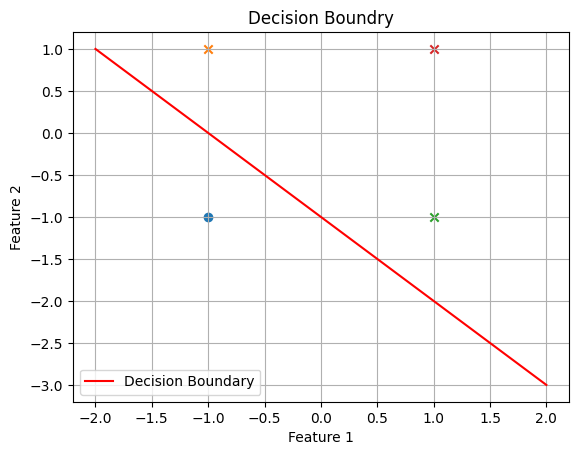

In [2]:
xtrain= [(1.0, -1.0, -1.0), 
         (1.0, -1.0, 1.0), 
         (1.0, 1.0, -1.0), 
         (1.0, 1.0, 1.0)]

OR = [-1,1,1,1]


weights = fit(xtrain=xtrain , ytrain=OR , weights= [0,0,0] , LR=0.0001)
print(weights)
plot(weights,xtrain,OR)





# Iris Dataset

In [3]:
import pandas as pd
iris = pd.read_csv("/kaggle/input/iris/Iris.csv") 
iris = iris[iris['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
mapp = {'Iris-setosa' : 1 , 'Iris-versicolor' : -1}

iris['Species'] = iris['Species'].map(mapp)
iris.insert(0, 'Bias', 1)
iris.drop('Id' , axis= 1 , inplace=True)

y = iris.pop('Species').tolist()


#train test split
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(iris , y , train_size= 0.8)


xtrain = [tuple(x) for x in X_train.values]
xtest = [tuple(x) for x in X_test.values]


# Testing with random Initial Weights and Learning rates

In [4]:
for i in range(0,5):
    weights = []
    import random
    for i in range(len(xtrain[1])):
        weights.append(random.uniform(-1,1))

    LR = random.uniform(0,1)
    epochs =  round(random.uniform(100, 2000))

    print('initial weights')
    for i in range(len(weights)):
        print(f'w{i} =', '%5.2f' % weights[i])

    print(f'LR : {LR} Epochs : {epochs}') 

    weights = fit(xtrain=xtrain , ytrain=y_train , weights= weights  , LR = LR ,  epochs = epochs)
    print('\nfinal weights')

    for i in range(len(weights)):
        print(f'w{i} =', '%5.2f' % weights[i])


    from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
    p = predict(xtest,weights)
    print('\naccuracy_score : ' , accuracy_score(y_test ,p) )
    print('F1 score:', f1_score(y_test, p))
    print('Recall:', recall_score(y_test , p))
    print('Precision:', precision_score(y_test , p), '\n')

initial weights
w0 = -0.98
w1 = -0.13
w2 =  0.66
w3 =  0.82
w4 =  0.85
LR : 0.14245627027573282 Epochs : 838

final weights
w0 = -0.89
w1 = -0.28
w2 =  1.33
w3 = -0.73
w4 =  0.23

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 = -0.85
w1 =  0.51
w2 = -0.51
w3 =  0.41
w4 =  0.59
LR : 0.9256776549726715 Epochs : 564

final weights
w0 = -0.17
w1 =  1.18
w2 =  3.61
w3 = -6.55
w4 = -2.28

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 =  0.43
w1 = -0.38
w2 =  0.93
w3 = -0.84
w4 =  0.92
LR : 0.9215119442184854 Epochs : 233

final weights
w0 =  0.43
w1 = -0.38
w2 =  0.93
w3 = -0.84
w4 =  0.92

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 =  0.18
w1 =  0.56
w2 = -0.08
w3 =  0.27
w4 = -0.47
LR : 0.7791318367425695 Epochs : 986

final weights
w0 =  0.70
w1 =  0.89
w2 =  3.30
w3 = -5.76
w4 = -2.94

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 = -0

[0.10153413777606801, 0.6853837914293717, 3.613655261891756, -3.869269896595668, -0.9500782079053369]


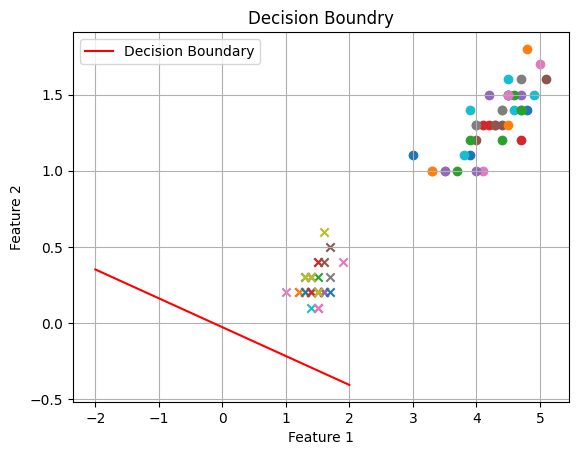

In [5]:
new_list = [(t[0], t[3] , t[4]) for t in xtrain]
print(weights)
plot(weights,new_list,y_train)

- The dataset had 5 attributes thats why the line looks weird
    - that's  why i didnt plot for every iteration
- All accuracies are 100% which is kinda sus tho 

# Breast Cancer Dataset

In [6]:
bres = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
mapp = {'B' : 1 , 'M' : -1}

bres['diagnosis'] = bres['diagnosis'].map(mapp)
bres.drop('id', axis=1 , inplace=True)
bres.insert(0, 'Bias', 1)

y = bres.pop('diagnosis').tolist()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(bres)

bres = pd.DataFrame(df, columns=bres.columns)

#train test split
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(bres , y , train_size= 0.8)


xtrain = [tuple(x) for x in X_train.values]
xtest = [tuple(x) for x in X_test.values]

/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [7]:
#Changing LR Epochs constant at 1000
LRs = []
# Epochs = []
accu = []
# for i in range(0,5):
weights = []
import random
for i in range(len(xtrain[1])):
    weights.append(random.uniform(-1,1))

    LR = random.uniform(0,1)
    #epochs =  round(random.uniform(100, 2000))
    LRs.append(LR)
    #Epochs.append(epochs)


    print(f'LR : {LR}') 

    weights = fit(xtrain=xtrain , ytrain=y_train , weights=weights  , LR = LR ,  epochs = 1000)

    from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
    p = predict(xtest,weights)
    print('\naccuracy_score : ' , accuracy_score(y_test ,p) )
    accu.append(accuracy_score(y_test ,p))
    print('F1 score:', f1_score(y_test, p ))
    print('Recall:', recall_score(y_test , p))
    print('Precision:', precision_score(y_test , p), '\n')




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR : 0.1468737780244328

accuracy_score :  0.3508771929824561
F1 score: 0.0
Recall: 0.0
Precision: 0.0 

LR : 0.4999950252371115

accuracy_score :  0.8508771929824561
F1 score: 0.8859060402684563
Recall: 0.8918918918918919
Precision: 0.88 

LR : 0.3252076873120362

accuracy_score :  0.8947368421052632
F1 score: 0.9166666666666667
Recall: 0.8918918918918919
Precision: 0.9428571428571428 

LR : 0.29144465648561946

accuracy_score :  0.8508771929824561
F1 score: 0.8874172185430463
Recall: 0.9054054054054054
Precision: 0.8701298701298701 

LR : 0.2481693290954221

accuracy_score :  0.8859649122807017
F1 score: 0.9115646258503401
Recall: 0.9054054054054054
Precision: 0.9178082191780822 

LR : 0.6819336985698682

accuracy_score :  0.8947368421052632
F1 score: 0.9210526315789475
Recall: 0.9459459459459459
Precision: 0.8974358974358975 

LR : 0.4105017015994774

accuracy_score :  0.9035087719298246
F1 score: 0.9271523178807948
Recall: 0.9459459459459459
Precision: 0.9090909090909091 

LR : 0.3

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

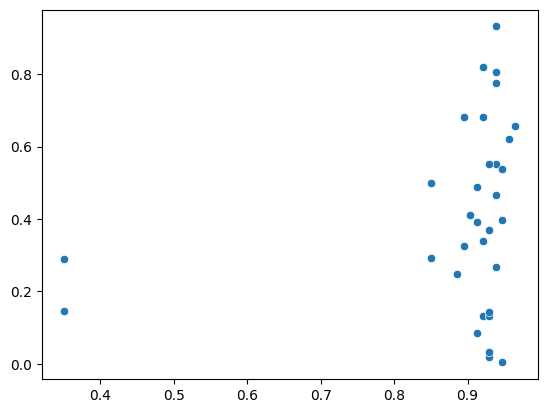

In [8]:
import seaborn as sns
sns.scatterplot(x = accu , y = LRs)

- High LR means low Accuracy
- Harder for the model to converge

In [9]:
#Changing Epochs LR constant at 0.0001
# LRs = []
Epochs = []
accu = []
for i in range(0,5):
    weights = []
    import random
    for i in range(len(xtrain[1])):
        weights.append(random.uniform(-1,1))

    # LR = random.uniform(0,1)
    epochs =  round(random.uniform(100, 2000))
    # LRs.append(LR)
    Epochs.append(epochs)
    

    print(f'Epcohs : {epochs}') 

    weights = fit(xtrain=xtrain , ytrain=y_train , weights=weights  , LR = 0.0001 ,  epochs = epochs)
  
    from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
    p = predict(xtest,weights)
    print('\naccuracy_score : ' , accuracy_score(y_test ,p) )
    accu.append(accuracy_score(y_test ,p))
    print('F1 score:', f1_score(y_test, p))
    print('Recall:', recall_score(y_test , p))
    print('Precision:', precision_score(y_test , p), '\n')




Epcohs : 146

accuracy_score :  0.3508771929824561
F1 score: 0.0
Recall: 0.0
Precision: 0.0 

Epcohs : 873


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



accuracy_score :  0.3508771929824561
F1 score: 0.0
Recall: 0.0
Precision: 0.0 

Epcohs : 460


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



accuracy_score :  0.3508771929824561
F1 score: 0.0
Recall: 0.0
Precision: 0.0 

Epcohs : 281


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



accuracy_score :  0.3508771929824561
F1 score: 0.0
Recall: 0.0
Precision: 0.0 

Epcohs : 527


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



accuracy_score :  0.3508771929824561
F1 score: 0.0
Recall: 0.0
Precision: 0.0 



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

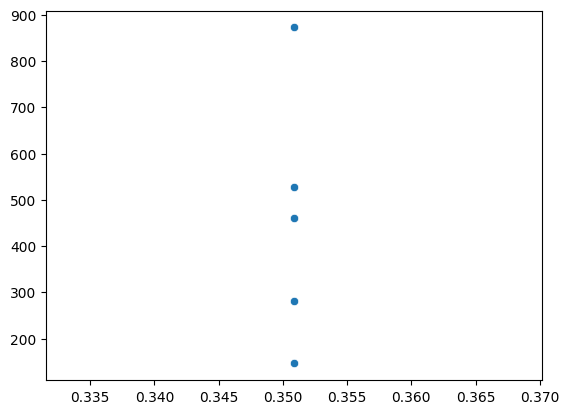

In [10]:
import seaborn as sns
sns.scatterplot(x = accu , y = Epochs)

- low epochs are getting better results 

- random weights could be the reason the plot has no trend 
